In [1]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
from PIL import Image

import os
import numpy as np
import pathlib

2024-05-11 11:24:52.340161: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 11:24:52.626904: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-11 11:24:53.475223: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-11 11:24:56.211104: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_dir = "../data/input/train" # Datasets path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('../data/input/train')

In [3]:
bacterial_spot = list(data_dir.glob('Tomato___Bacterial_spot/*'))[:300]
early_blight = list(data_dir.glob('Tomato___Early_blight/*'))[:300]
late_blight = list(data_dir.glob('Tomato___Late_blight/*'))[:300]
leaf_mold = list(data_dir.glob('Tomato___Leaf_Mold/*'))[:300]
septoria_leaf_spot = list(data_dir.glob('Tomato___Septoria_leaf_spot/*'))[:300]
spider_mites_two_spotted_spider_mites = list(data_dir.glob('Tomato___Spider_mites Two-spotted_spider_mite/*'))[:300]
target_spot = list(data_dir.glob('Tomato___Target_Spot/*'))[:300]
tomato_yellow_leaf_curl_virus = list(data_dir.glob('Tomato___Tomato_Yellow_Leaf_Curl_Virus/*'))[:300]
tomato_mosaic_virus = list(data_dir.glob('Tomato___Tomato_mosaic_virus/*'))[:300]
healthy = list(data_dir.glob('Tomato___healthy/*'))[:300]

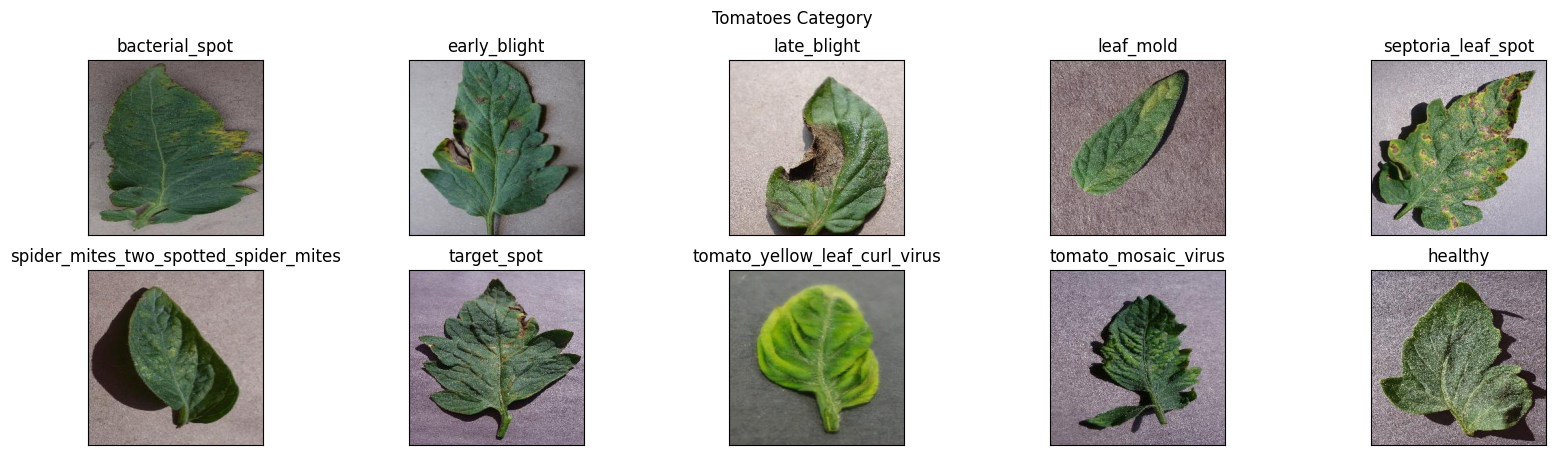

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(20,5))

fig.suptitle('Tomatoes Category')

labels = ['bacterial_spot', 'early_blight', 'late_blight', 'leaf_mold', 'septoria_leaf_spot', 
            'spider_mites_two_spotted_spider_mites', 'target_spot', 'tomato_yellow_leaf_curl_virus', 
            'tomato_mosaic_virus', 'healthy'] 

# Reading images
bacterial_spot_image = img.imread(bacterial_spot[0])
early_bright_image = img.imread(early_blight[0])
late_blight_image = img.imread(late_blight[0])
leaf_mold_image = img.imread(leaf_mold[0])
septoria_leaf_spot_image = img.imread(septoria_leaf_spot[0])
spider_mites_two_spotted_spider_mites_image = img.imread(spider_mites_two_spotted_spider_mites[0])
target_spot_image = img.imread(target_spot[0])
tomato_yellow_leaf_curl_virus_image = img.imread(tomato_yellow_leaf_curl_virus[0])
tomato_mosaic_virus_image = img.imread(tomato_mosaic_virus[0])
healthy_image = img.imread(healthy[0])

images = [bacterial_spot_image, early_bright_image, late_blight_image, leaf_mold_image, septoria_leaf_spot_image, 
         spider_mites_two_spotted_spider_mites_image, target_spot_image, tomato_yellow_leaf_curl_virus_image, 
         tomato_mosaic_virus_image, healthy_image]
 
# Showing images
for i in range (5):
    ax[0, i].imshow(images[i])
for i in range (5):
    ax[1, i].imshow(images[i+5])

# Remove ticks  
for i in range (5):
    ax[0, i].set_xticks([])
    ax[0, i].set_yticks([])
for i in range (5):
    ax[1, i].set_xticks([])
    ax[1, i].set_yticks([])

# Label axes
for i in range (5):
    ax[0, i].set_title(labels[i])
for i in range (5):
    ax[1, i].set_title(labels[i+5])

plt.show()

In [5]:
# Contains the images path
df_images = {
    'bacterial_spot': bacterial_spot,
    'early_blight': early_blight,
    'late_blight': late_blight,
    'leaf_mold': leaf_mold,
    'septoria_leaf_spot': septoria_leaf_spot,
    'spider_mites_two_spotted_spider_mites': spider_mites_two_spotted_spider_mites,
    'target_spot' : target_spot,
    'tomato_yellow_leaf_curl_virus': tomato_yellow_leaf_curl_virus,
    'tomato_mosaic_virus' : tomato_mosaic_virus,
    'healthy': healthy
}

# Contains numerical labels for the two categories
df_labels = {
    'bacterial_spot': 0,
    'early_blight': 1,
    'late_blight': 2,
    'leaf_mold': 3,
    'septoria_leaf_spot': 4,
    'spider_mites_two_spotted_spider_mites': 5,
    'target_spot' : 6,
    'tomato_yellow_leaf_curl_virus': 7,
    'tomato_mosaic_virus' : 8,
    'healthy': 9
}

In [6]:
img = cv2.imread(str(df_images['bacterial_spot'][0])) # Converting it into numerical arrays
img.shape # Its currently 256 by 256 by 3

(256, 256, 3)

In [7]:
X, y = [], [] # X = images, y = labels

for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

In [8]:
# Standarizing
X = np.array(X)
y = np.array(y)
X = X/255

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

: 

In [ ]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv2 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [ ]:
num_label = 10 # number of labels

model = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)
])

model.summary()

In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = model.fit(X_train, y_train, epochs=10)

In [ ]:
model.evaluate(X_test,y_test)


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))